In [3]:
from util.sample import mnist_iid, mnist_noniid, cifar_iid, cifar_noniid,cifar10_noniid, fashion_mnist_noniid, fashion_mnist_iid
from torchvision import datasets, transforms
import numpy as np

In [4]:
trans_mnist = transforms.Compose(
            [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_train = datasets.FashionMNIST(
    '../data/mnist/', train=True, download=True, transform=trans_mnist)
dataset_test = datasets.FashionMNIST(
    '../data/mnist/', train=False, download=True, transform=trans_mnist)
# sample users
# dict_users = np.load('./data/non_iid_cifar.npy', allow_pickle=True).item()

In [5]:
len(dataset_train)

60000

In [6]:
dict_users = fashion_mnist_iid(dataset_train, 100)

In [7]:
labels_dict = []
for i in range(len(dict_users)):
    labels_dict.append([])
    for idx in dict_users[i]:
        image, label = dataset_train[idx]
        labels_dict[i].append(label)

In [8]:
import collections
counts_dict = []
for i in range(len(dict_users)):
    counts_dict.append(collections.Counter(labels_dict[i]))

# In ra các số lượng nhãn trong mỗi phần tử trong dict
for i in range(len(dict_users)):
    print("Part", i + 1, ":", counts_dict[i])

Part 1 : Counter({9: 75, 0: 66, 4: 65, 7: 61, 5: 60, 8: 58, 6: 55, 1: 55, 2: 53, 3: 52})
Part 2 : Counter({7: 81, 6: 73, 3: 66, 1: 63, 0: 55, 5: 54, 8: 54, 2: 53, 9: 51, 4: 50})
Part 3 : Counter({9: 75, 0: 74, 6: 63, 1: 62, 4: 61, 7: 59, 5: 56, 3: 51, 8: 51, 2: 48})
Part 4 : Counter({6: 69, 8: 68, 1: 65, 4: 62, 0: 59, 2: 57, 5: 56, 3: 56, 7: 55, 9: 53})
Part 5 : Counter({4: 69, 5: 66, 7: 63, 9: 62, 1: 62, 3: 62, 6: 59, 2: 58, 0: 52, 8: 47})
Part 6 : Counter({4: 66, 0: 65, 7: 63, 3: 62, 5: 62, 8: 60, 9: 59, 2: 57, 1: 54, 6: 52})
Part 7 : Counter({1: 76, 5: 67, 4: 65, 2: 62, 3: 62, 7: 61, 9: 58, 0: 57, 6: 47, 8: 45})
Part 8 : Counter({8: 69, 5: 66, 0: 65, 4: 63, 9: 62, 6: 59, 7: 56, 2: 54, 1: 54, 3: 52})
Part 9 : Counter({2: 73, 0: 70, 9: 66, 7: 62, 5: 61, 3: 57, 6: 55, 1: 53, 4: 52, 8: 51})
Part 10 : Counter({5: 68, 7: 68, 2: 67, 3: 63, 8: 61, 9: 61, 1: 54, 6: 54, 4: 54, 0: 50})
Part 11 : Counter({8: 70, 6: 68, 5: 67, 4: 67, 3: 60, 9: 58, 1: 58, 0: 53, 7: 52, 2: 47})
Part 12 : Counter({

In [1]:
import matplotlib.pyplot as plt


In [2]:
list_attack = ['dba22', 'dba44']
list_noise =['noise0.001']
list_algorithm =['flame', 'flame_nocluster']

/tmp/ipykernel_44386/2675399553.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


FileNotFoundError: [Errno 2] No such file or directory: '../FLAME/result/attack dba square 2x2 pixel, noise 0.001.pdf'

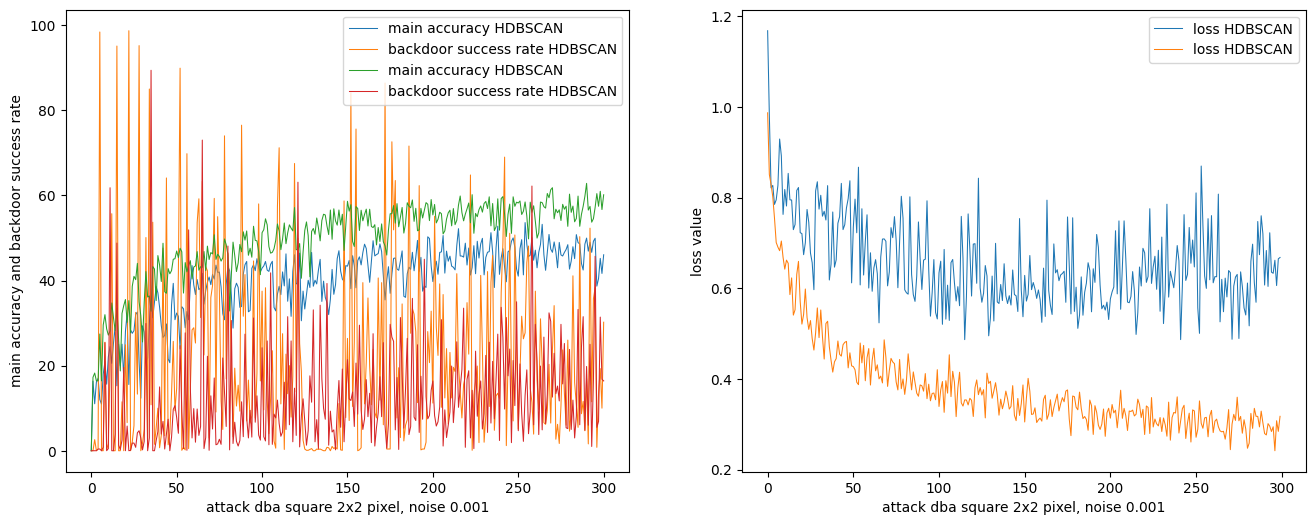

In [4]:
for attack in list_attack:
    if(attack =='dba22'):
        wide_long = 'attack dba square 2x2 pixel'
    else:
        wide_long = 'attack dba square 4x4 pixel'
    for noise in list_noise:
        if(noise=='noise0.001'):
            noi  = wide_long+', '+'noise 0.001'
        else:
            noi = wide_long+', '+'noise 0.01'
        plt.figure(figsize=(16,6))
        plt.xlabel('epochs')
        plt.ylabel('%')
        for algorithm in list_algorithm:
            if algorithm =='flame':
                main_label = 'main accuracy HDBSCAN'
                back_label = 'backdoor success rate HDBSCAN'
                loss_label = 'loss HDBSCAN'
            elif algorithm =='flame_no': 
                main_label = 'rmain accuracy no cluster'
                back_label = 'backdoor success rate no cluster'
                loss_label = 'loss no cluster'
                
            path = '../BuildFL/save/'+algorithm +'_'+attack+'_'+noise+'.txt'
            with open(path, "r") as file:
                content = file.read()
            # Trích xuất các giá trị trong main_task_accuracy và backdoor_accuracy
                main_task_accuracy = []
                backdoor_accuracy = []
                lines = content.split("\n")
                for line in lines:
                    if line.startswith("main_task_accuracy="):
                        main_task_accuracy = [float(value) for value in line.strip().split("[")[1].split("]")[0].split(", ")]
                    elif line.startswith('loss_list='):
                        test_loss = [float(value) for value in line.strip().split("[")[1].split("]")[0].split(", ")]
                    elif line.startswith("backdoor_accuracy="):
                        backdoor_accuracy = [float(value) for value in line.strip().split("[")[1].split("]")[0].split(", ")]
            plt.subplot(121)
            plt.plot(main_task_accuracy, label = main_label, linewidth =0.75)
            plt.plot(backdoor_accuracy, label = back_label, linewidth =0.75)
            plt.xlabel(noi)
            plt.ylabel('main accuracy and backdoor success rate')
            plt.legend()
            plt.subplot(122)
            plt.plot(test_loss, label = loss_label, linewidth =0.75)
            plt.xlabel(noi)
            plt.ylabel('loss value')
            plt.legend()
            pa = '../BuildFL/save/'
        plt.savefig('../BuildFL/save/'+ noi+'.pdf', format = 'pdf',bbox_inches='tight')
            